<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="Faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 3) </b><br>
                <font color="#21618C" size=4px>
                    <b> MNIST neural network - Hyperparameter Optimization using Tensorflow</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
#Load the MNIST digit datset
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
xtrain.shape # there are 60000 images of each 28 rows and 28 columns

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

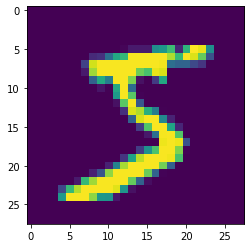

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(xtrain[0,:,:])

In [ ]:
ytrain[0] # The output label for the image shown above

5

In [ ]:
x_train=xtrain.reshape(60000,28*28) # reshaping images as one dimensional
x_test=xtest.reshape(10000,28*28)

In [ ]:
x_train=x_train/255. # scaling the images
x_test=x_test/255.

In [ ]:
y_train=tf.keras.utils.to_categorical(ytrain,num_classes=10) # Encoding the target levels
y_test=tf.keras.utils.to_categorical(ytest,num_classes=10) 

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
ytrain[0]

5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers, optimizers

In [ ]:
#Create the function to define a DNN model with dynamic iteration, learning_rate, 
#regularization penalty# neurons in the hidden layer for tuning
def train_and_test_model(itr,lr,lamda):
    
    iterations=itr
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    
    model=Sequential()
    model.add(Dense(units=hidden_nodes,activation='relu',input_dim=784))
    model.add(Dense(units=hidden_nodes,activation='relu'))
    model.add(Dense(units=output_nodes,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    
    model.fit(x_train,y_train,epochs=iterations,batch_size=1000,verbose=0)
    [loss,score_train]=model.evaluate(x_train,y_train)
    [loss,score_test]=model.evaluate(x_test,y_test)
    
    return score_train,score_test  # returning both train and test scores

In [ ]:
lr=0.00001 # Choose very small value of learning rate
lamda=0
train_and_test_model(10,lr,lamda) # Leading to vanishing gradiant problem
# loss is not changing in each iteration much and model accuracy is poor. 
#To understand it run with verbose =1 in the above function

10000/10000 [==============================] - 0s 45us/sample - loss: 2.3371 - accuracy: 0.0807


(0.08606666, 0.0807)

In [ ]:
lr=0.001 # Increasing the learning_rate to 0.001 improving the performance slightly
lamda=0 # no regularization
train_and_test_model(10,lr,lamda)

10000/10000 [==============================] - 0s 45us/sample - loss: 1.9631 - accuracy: 0.5101


(0.5013667, 0.5101)

In [ ]:
lr=0.1# Increasing the learning_rate to 0.1 improving the performance above 90 percent
lamda=0
train_and_test_model(10,lr,lamda)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.1965 - accuracy: 0.9451


(0.94411665, 0.9451)

In [ ]:
lr=1 # learning rate of 1 giving very good results for this datset [It may not be same for all the data]
lamda=0
train_and_test_model(10,lr,lamda)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0827 - accuracy: 0.9744


(0.98548335, 0.9744)

In [ ]:
lr=50   # Increasing the lr to 50 leading to Exploding Gradient. Loss going out of control
lamda=0
train_and_test_model(10,lr,lamda)

10000/10000 [==============================] - 0s 46us/sample - loss: nan - accuracy: 0.0980


(0.09871667, 0.098)

In [ ]:
lr=0.0000001  # Vanishing Gradient
lamda=0
train_and_test_model(10,lr,lamda)

10000/10000 [==============================] - 0s 46us/sample - loss: 2.3141 - accuracy: 0.0677


(0.0626, 0.0677)

In [ ]:
lr=1 
lamda=0.02 # Introduce small regularization, regularization will reduce overfitting, but bias error may slightly increase
train_and_test_model(10,lr,lamda) # Less overfitting

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3496 - accuracy: 0.9129


(0.91325, 0.9129)

In [ ]:
lr=1 
lamda=1 
train_and_test_model(10,lr,lamda) # Underfitting, penalty(lamda) of 1, reducing the performance greatly

10000/10000 [==============================] - 0s 48us/sample - loss: 26.0678 - accuracy: 0.1135


(0.11235, 0.1135)

In [ ]:
#Coarse tuning - Explore the model for wide span of learning rate and lamda(regularization penalty)
lr=[0.0001,0.001,0.01,0.1,1,10,20,50]
lam=[0.0001,0.001,0.01,0.1,1,10,20,50]
for i,j in zip(lr,lam):
    score=train_and_test_model(10,i,j)
    print('epocs:',10,'train_accuracy:',score[0],'test_accuracy:',score[1],'alpha:', i,'Regularization:',j)

10000/10000 [==============================] - 1s 69us/sample - loss: 2.3190 - accuracy: 0.1192
epocs: 10 train_accuracy: 0.11613333 test_accuracy: 0.1192 alpha: 0.0001 Regularization: 0.0001
10000/10000 [==============================] - 1s 74us/sample - loss: 1.9843 - accuracy: 0.5331
epocs: 10 train_accuracy: 0.5283167 test_accuracy: 0.5331 alpha: 0.001 Regularization: 0.001
10000/10000 [==============================] - 1s 69us/sample - loss: 0.7006 - accuracy: 0.8806
epocs: 10 train_accuracy: 0.87193334 test_accuracy: 0.8806 alpha: 0.01 Regularization: 0.01
10000/10000 [==============================] - 1s 68us/sample - loss: 0.5205 - accuracy: 0.8958
epocs: 10 train_accuracy: 0.89098334 test_accuracy: 0.8958 alpha: 0.1 Regularization: 0.1
10000/10000 [==============================] - 1s 61us/sample - loss: 26.8169 - accuracy: 0.1190
epocs: 10 train_accuracy: 0.118666664 test_accuracy: 0.119 alpha: 1 Regularization: 1
10000/10000 [==============================] - 1s 58us/sample 

In [ ]:
#Another random way of doing coarse tuning
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_model(10, lr, Lambda)
    print('k:',k,'epocs:',100,'accuracy:',best_acc,'alpha:', lr,'Regularization:',Lambda)


In [ ]:
import math
math.pow(10,np.random.uniform(-7.0, 3.0))

5.3027244576787756e-05

In [ ]:
#Create the function to define a DNN model with dynamic learning_rate, regularization penalty
         # neurons in the hidden layer,activation function and weight intitialization for tuning
def tune_model(learning_rate,activation, lamda,initializer,num_unit):
    model = Sequential()
    model.add(Dense(num_unit, kernel_initializer=initializer,activation=activation, input_dim=784))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initializer,activation=activation))
    #model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    sgd = optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

In [ ]:
#he_normal 
#std = sqrt(2/fan_in)
#fan_in= number of neurons in the hiddenlayer

In [ ]:
#Define hyper parameters values
batch_size = [20, 50, 100][:1]
epochs = [1, 20, 50][:1]
initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]
learning_rate = [0.1, 0.001, 0.02][:1]
lamda = [0.001, 0.005, 0.01][:1]
num_unit = [256, 128][:1]
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'][:1]

In [ ]:
#create dictionary with hyper parameters
parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  learning_rate=learning_rate,
                  lamda = lamda,
                  num_unit = num_unit,
                  initializer = initializer,
                  activation = activation)

In [ ]:
parameters

{'batch_size': [20],
 'epochs': [1],
 'learning_rate': [0.1],
 'lamda': [0.001],
 'num_unit': [256],
 'initializer': ['lecun_uniform'],
 'activation': ['relu']}

In [ ]:
# Make this keras model compatible to sklearn to apply gridsearchCV
model =tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=tune_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

In [ ]:
best_model = models.fit(x_train, y_train)
print('Best model :',best_model.best_params_)

Best model : {'activation': 'relu', 'batch_size': 20, 'epochs': 1, 'initializer': 'lecun_uniform', 'lamda': 0.001, 'learning_rate': 0.1, 'num_unit': 256}


In [ ]:
import pandas as pd
pd.DataFrame(best_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_epochs,param_initializer,param_lamda,param_learning_rate,param_num_unit,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.571217,0.26166,0.604265,0.041468,relu,20,1,lecun_uniform,0.001,0.1,256,"{'activation': 'relu', 'batch_size': 20, 'epoc...",0.95975,0.95275,0.9525,0.954333,0.961417,0.95615,0.003712,1


In [ ]:
# Run for all the combinations and take the best results interms of both bias and variance error